# Reading Simulation Data 

i

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import read_pic as rp
import os

# Fields to read.
fields_to_read={"B":True,"B_ext":True,"divB":True,"E":True,"E_ext":True,"rho":True,"J":True,
                "P":True,"PI":True,"Heat_flux":True,"N":True,"Qrem":True, "EF":True}
# Path of the folder containing the .h5 files to read.
files_path="../../nn/data/raw_data/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")
# Below we choose only initial time step just to view spatial distribution of the fields
choose_times = [0] # if list specific timeshots are chosen, i.e. [0, 1, 5], otherwise choose_times = None
#choose_species = ['e1',None,'e2',None] # the ones which have directive None will be ignored, the ones which have same name will be summed over


experiments = ['high_res_bg0', 'high_res_2', 'high_res_bg3', 'high_res_hbg']


In [13]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, choose_species=['e1','i1','e2','i2'], choose_times=[3],choose_x=[0,384], choose_y=[179,333], verbose=False)

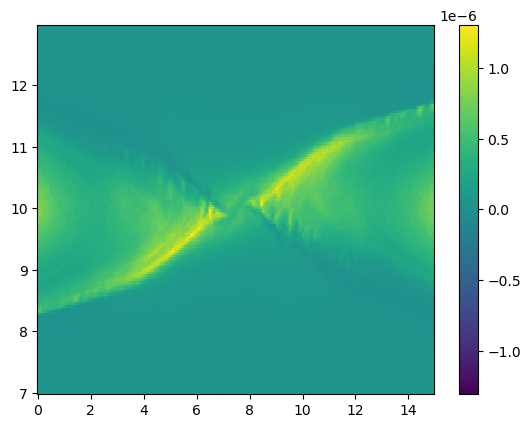

In [14]:
EFx = data['high_res_hbg']['Ppar']['e1']+data['high_res_hbg']['Ppar']['e2']
plt.pcolormesh(X, Y, EFx, cmap='viridis', vmax=EFx.max(), vmin=-EFx.max())
plt.colorbar()
plt.show()

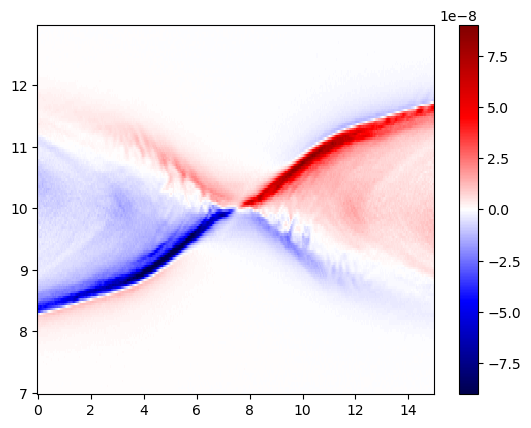

In [15]:
EFx = data['high_res_hbg']['EFx']['e1']+data['high_res_hbg']['EFx']['e2']
plt.pcolormesh(X, Y, EFx, cmap='seismic', vmax=EFx.max(), vmin=-EFx.max())
plt.colorbar()
plt.show()

# Data Manip
# Plotting Data

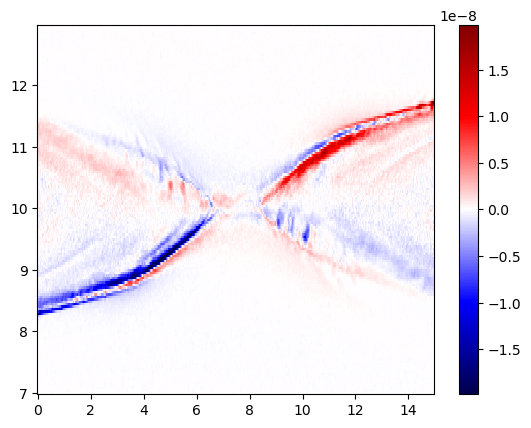

In [16]:
qx = data['high_res_hbg']['qx']['e1']+data['high_res_hbg']['qx']['e2']
plt.pcolormesh(X, Y, qx, cmap='seismic', vmax=qx.max(), vmin=-qx.max())
plt.colorbar()
plt.show()

In [2]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, choose_species=['e1',None,'e2',None], choose_times=[0],choose_x=[0,384], choose_y=[179,333], verbose=False)

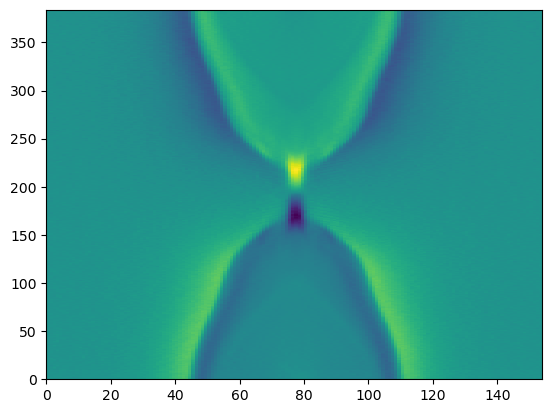

In [16]:
plt.pcolormesh((data['high_res_bg0']['Jx']['e1']+data['high_res_bg0']['Jx']['e2'])/(data['high_res_bg0']['rho']['e1']+data['high_res_bg0']['rho']['e2']))

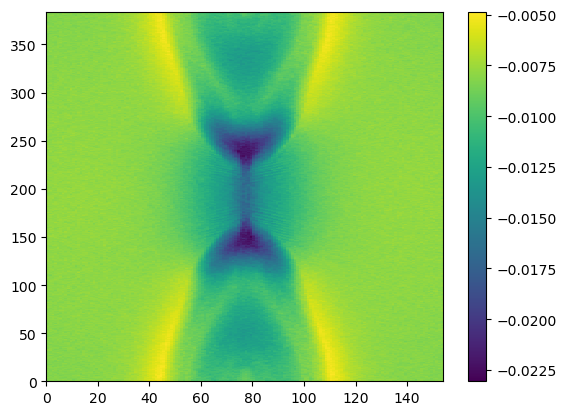

In [13]:
plt.pcolormesh(data['high_res_bg0']['rho']['e2'])
plt.colorbar()

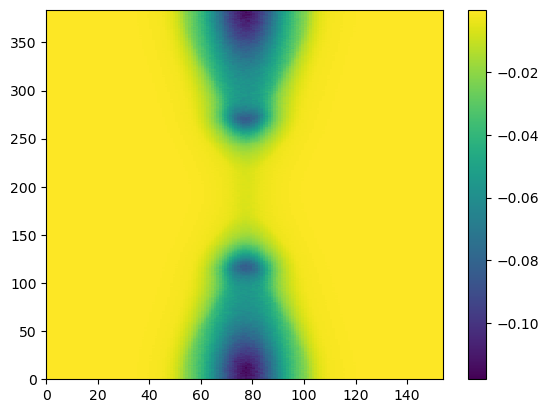

In [14]:
plt.pcolormesh(data['high_res_bg0']['rho']['e1'])
plt.colorbar()

In [22]:
species = [None,'e',None,'e',None]
dictionary = {}
for i, species in enumerate(species):
    if species is not None:
        dictionary[species] = i
print(dictionary)

{'e': 3}


In [27]:
import numpy as np
species = [None,'e',None,'e',None]
dictionary = {}
for i, species_label in enumerate(species):
    if species_label is not None:
        if species_label in dictionary:
            dictionary[species_label] += np.array([i,i,i])
        else:
            dictionary[species_label] = np.array([i,i,i])
print(dictionary)

{'e': array([4, 4, 4])}


In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import read_pic as rp
import os

# Fields to read.
fields_to_read={"B":True,"B_ext":True,"divB":True,"E":True,"E_ext":True,"rho":True,"J":True,
                "P":True,"PI":True,"Heat_flux":True,"N":True,"Qrem":True, "EF":True}
# Path of the folder containing the .h5 files to read.
files_path="../../nn/data/raw_data/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")
# Below we choose only initial time step just to view spatial distribution of the fields
choose_times = [0] # if list specific timeshots are chosen, i.e. [0, 1, 5], otherwise choose_times = None
#choose_species = ['e1',None,'e2',None] # the ones which have directive None will be ignored, the ones which have same name will be summed over


experiments = ['high_res_bg0', 'high_res_2', 'high_res_bg3', 'high_res_hbg']


In [2]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, choose_species=['e',None,'e',None], choose_times=[3],choose_x=[0,384], choose_y=[179,333], verbose=False)

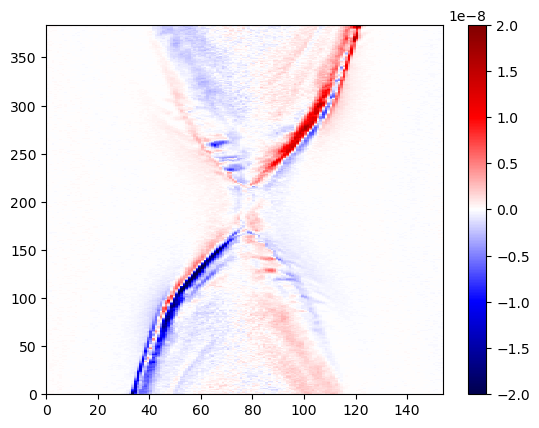

In [9]:
plt.pcolormesh(data['high_res_hbg']['qx']['e'],cmap='seismic',vmin=-2e-8,vmax=2e-8)
plt.colorbar()